# ***Land-use Classification***

![title image](https://toposmagazine.com/wp-content/uploads/2022/04/max-bottinger-8VL7meb_k7U-unsplash-scaled-aspect-ratio-16-9-scaled.jpg)

Image classification through deep learning is a rapidly growing field, evolving from recognizing objects with clear features to analyzing blurry images that even challenge human perception. The rapid advancement and high accuracy of AI in this task deserve more in-depth discussion. This report will delve into advanced applications of deep learning in image classification, with a specific focus on land-use classification using satellite images.

A critical technique that must be discussed in the context of image classification with deep learning is the Convolutional Neural Network (CNN). CNNs have become a cornerstone in image classification tasks due to their unique layered architecture, which includes convolutional, pooling, and fully connected layers. These layers are designed to automatically learn the features and hierarchies of input data,
making them particularly suited for recognizing patterns in visual data. This project leverages this technique to classify various types of land uses, such as forests, airports, tennis courts, and parking lots, captured in satellite imagery. To enhance user interaction, a simple web UI is provided to effectively displays the classification results.

Besides, our methodology includes the integration of transfer learning, where we leverage pre-trained models such as AlexNet and GoogLeNet. Through transfer learning, we can utilize the knowledge gained from extensive prior training of these models and apply it to our specific task of land use classification. Transfer learning is especially beneficial when training time and computational resources are limited, which is exactly my case.

This report will delve into the intricacies of CNNs and transfer learning, illustrating their roles in the project. Challenges of using satellite imagery, the process of adapting pre-trained models to our specific situation, and the insights gained from them are discussed at the end. For now, join me on this journey to uncover the  exciting developments of deep learning in image classification!



**Model Architecture**


![CNN Image](https://datagen.tech/wp-content/uploads/2023/03/Typical_cnn.png)



**Convolutional neural networks (CNNs)** are a particular type of neural network that is mostly utilized for tasks connected to image processing. We can think of the CNN as a complex machine designed to understand images. It's like a factory assembly line, where each part of the line does a specific job to help understand the picture better:

**-Input Layer:** This is where the raw pixel data of the image is input to the network. We can think that  as giving the machine a image, like inserting a photo into a photo scanner.

**-Convolutional Layers:** They apply a number of filters to the input to create feature maps that contain information of edges, colors, or shapes. It's like having a set of magnifying glasses, each highlighting different parts of the picture.

**-Activation Functions:** These functions are like decision-makers that decide which features found by the filters are important and which are not.

**-Pooling Layers:** They reduce the amount of information a fact which means that the machine has to process by keeping only the most important parts.

**-Fully Connected Layers:** These layers take all the important features identified and combine them to make a final decision, like putting together clues to solve a mystery.

**-Output Layer:** This layer produces the final output, like a scanner that not only scans the image but also tells you what’s in it.

**Loss Function**
The loss function informs the machine of how much its predictions differ from the real responses, much like a scoring system. If it's a game of guessing what's in the image, the loss function tells the machine how many points it loses for a wrong guess.

**Optimizer**
Optimizers are algorithms or methods used to change the attributes of the neural network, such as weights and learning rate, to reduce the losses. It adjusts the machine's strategy (like how it looks at images or weighs different features) to improve its performance.

**Learning Rate**
Every time the machine picks up a new skill, the learning rate determines how far it will advance in self-improvement. If it is too big, it might overshoot and miss the best solution; if it is too small, it might take too long to get better.

**Batch Size**
The number of photos the machine views in a batch before attempting to learn from them is called the batch size. Larger batches indicate more stable but maybe slower lear

**AlexNet**

AlexNet is like a pioneer in the world of deep learning architectures. Imagine it as a tall building with eight levels (or layers), where each level is designed to progressively understand and interpret various aspects of an image. The lower levels focus on basic features like edges or textures, and as you move up, the levels start recognizing more complex features like shapes or specific objects. What made AlexNet stand out when it was first introduced was its size and complexity compared to previous models, enabling it to recognize and classify images with impressive accuracy.

**GoogleNet**

GoogLeNet is more like an intricate maze with many paths (or layers) and some smart shortcuts. Officially known as Inception Network, it's much deeper than AlexNet, with 22 layers. The clever bit about GoogLeNet is how it looks at an image through different 'lenses' at each stage—some focusing on the big picture, others zooming into details—before deciding what the image represents. This approach allows GoogLeNet to be both efficient and powerful in understanding and classifying images, even better than AlexNet in many cases.

# *Part1. Download Data and Process Data*
link to our source dataset: https://www.kaggle.com/datasets/apollo2506/landuse-scene-classification

## 1.1  Download data

The paper uses the apollo2506-landuse-scene-dataset from Kaggle. Kaggle is a platform where machine learning lovers can compete for algorithms, analyze ML problems and share amazing datasets. First of all, the following code is used to directly download the original datasets through Kaggle API. After submitting the personal Kaggle API key (which can be acquired from your Kaggle account profile), the Kaggle-associated Python library will verify your identity and initiate the downloading process.



In [15]:
import pandas as pd
import google
import numpy as np
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import torchvision
import torch
from torchvision import transforms
from PIL import Image
from torchvision import datasets, models, transforms
import torch.nn.functional as F
from google.colab import files
import gradio as gr

In [ ]:
!pip install kaggle


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Upload Kaggle API key (Login Kaggle account - settings - download API key "Kaggle.json")
files.upload()

# Move API key to the appropriate location and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download dataset from kaggle and unzip
!kaggle datasets download -d apollo2506/landuse-scene-classification
!unzip -q /content/landuse-scene-classification.zip -d /content/

100% 1.98G/1.98G [00:21<00:00, 120MB/s]
100% 1.98G/1.98G [00:21<00:00, 98.5MB/s]


The following code transform the input data into a designed size. We want to make sure all data is alinged! We have two sets of transform the data according to our needs.

In [ ]:
size_compose = transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(256),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## 1.2 Data Loading and Data Transformation

However, it is still recommded here to download the dataset into your local device to save yourself some time. In the following code, we will use the datasets that is avaliable in our local device. Since the original datasets already split the datasets, we inheritate the split ratio

In [ ]:
# Read dataset folder - Entire dataset
file_path = 'C:/Users/75606/Desktop/MIE1517/Project/archive/images_train_test_val' # replace with your own path
train_dir = os.path.join(file_path, 'train')
val_dir = os.path.join(file_path, 'validation')
test_dir = os.path.join(file_path, 'test')

classes = ["agricultural", "airplane", "baseballdiamond", "beach", "buildings",
           "chaparral", "denseresidential", "forest", "freeway","golfcourse","harbor",
           "intersection","mediumresidential","mobilehomepark","overpass","parkinglot",
           "river","runway","sparseresidential","storagetanks","tenniscourt"]


train_data = datasets.ImageFolder(train_dir, transform = size_compose)
val_data = datasets.ImageFolder(val_dir, transform = size_compose)
test_data = datasets.ImageFolder(test_dir, transform = size_compose)
print(len(train_data),len(val_data),len(test_data))

# Load data for google net
# train_dir = 'C:/Users/75606/Desktop/MIE1517/Project/archive/images_train_test_val/train'
# val_dir = 'C:/Users/75606/Desktop/MIE1517/Project/archive/images_train_test_val/validation'
# test_dir = 'C:/Users/75606/Desktop/MIE1517/Project/archive/images_train_test_val/test'
train_dataset_googlenet = torchvision.datasets.ImageFolder(root=train_dir, transform=data_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset_googlenet, batch_size=64, shuffle=True)
valid_dataset_googlenet = torchvision.datasets.ImageFolder(root=val_dir, transform=data_transforms)
valid_loader = torch.utils.data.DataLoader(valid_dataset_googlenet, batch_size=64, shuffle=True)
test_dataset_googlenet = torchvision.datasets.ImageFolder(root=test_dir, transform=data_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset_googlenet, batch_size=64, shuffle=True)

7350 2100 1050


We import another set of data which only contains **two class** from the original dataset. We will use those smallset to test the fesiability of our intial algorithm

In [ ]:
# Read dataset folder - Only 2 classes

file_path1 = 'C:/Users/75606/Desktop/MIE1517/Project/archive/small_data2'
train_dir1 = os.path.join(file_path1, 'train')
val_dir1 = os.path.join(file_path1, 'validation')

classes = ["agricultural", "airplane"]

train_data1 = datasets.ImageFolder(train_dir, transform = size_compose)
val_data1 = datasets.ImageFolder(val_dir, transform = size_compose)

print(len(train_data1),len(val_data1))

7350 2100


## 1.3 Data Preview

The dataset contains 21 class (features) and each class initially contain 100 samples. We try to enlarge the datasets through data augmentation techniques. Data augmentation involves the manipulation of images such as translation, rotation and random erasing. As a result, we increase the total images of each class to 500 per class. As you can see from the following display, some image has dark area because rotation is processed based on random center.

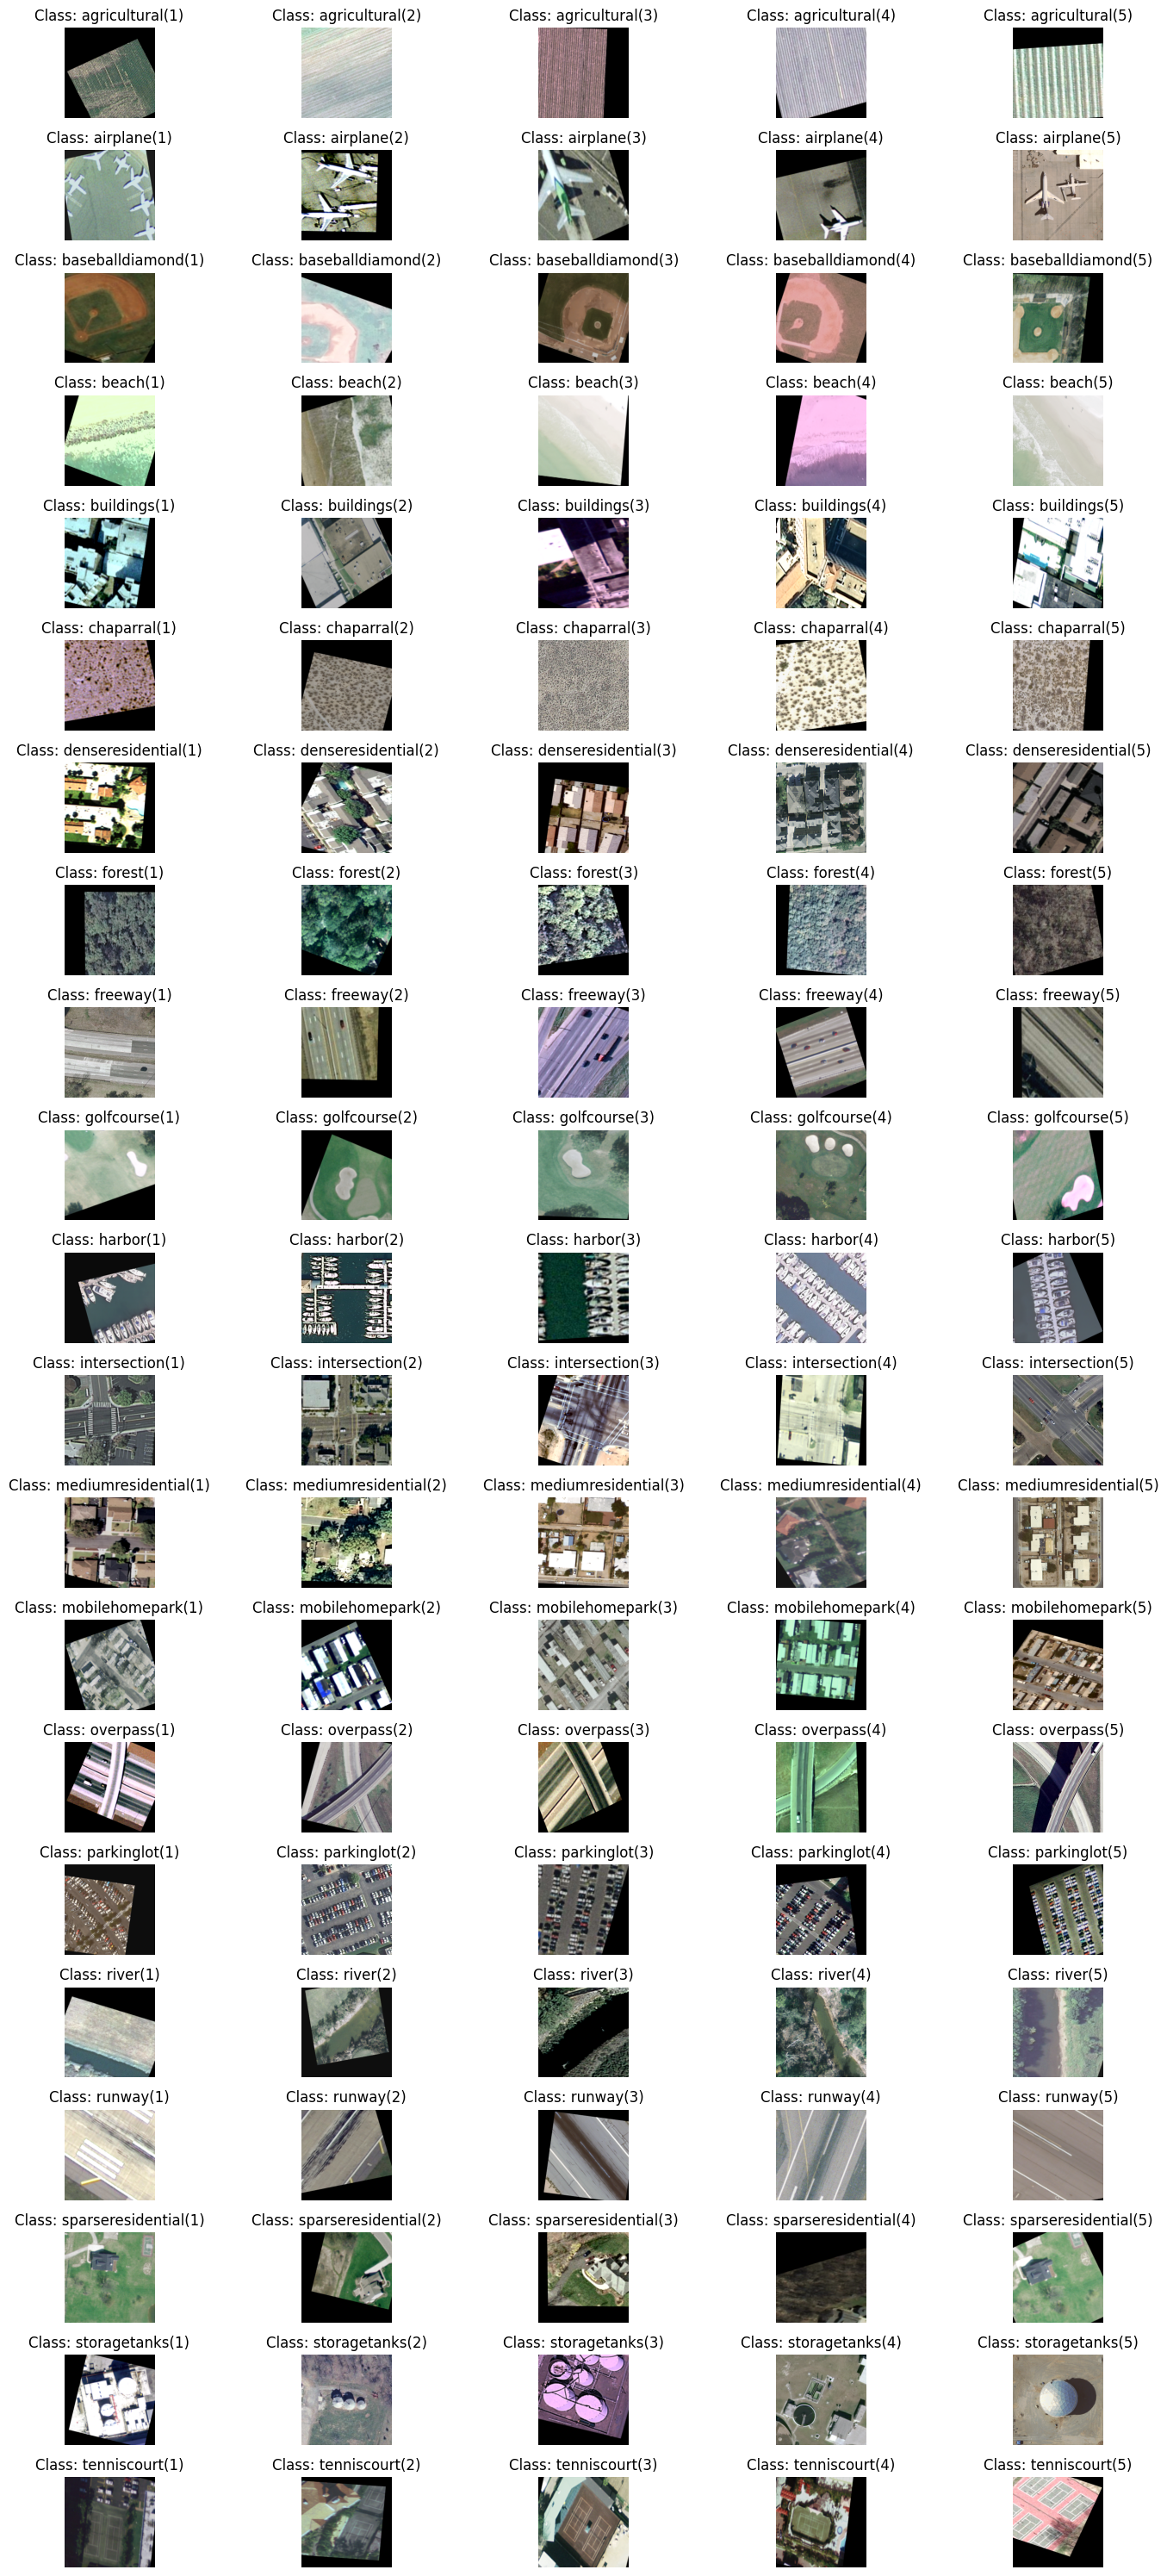

In [ ]:
# Show 5 img in each class
# keep track of displayed images per class
class_display_count = {class_name: 0 for class_name in classes}
max_images_per_class = 5  # Set the maximum number of images to display per class

fig, axs = plt.subplots(len(classes), max_images_per_class, figsize=(15, 30))

for i, (image, label) in enumerate(train_data):
    class_name = train_data.classes[label]
    # Check if we've already displayed the maximum number of images for this class
    if class_display_count[class_name] < max_images_per_class:

        ax = axs[classes.index(class_name), class_display_count[class_name]]
        image = image.permute(1, 2, 0).numpy()  # Convert the tensor to a NumPy array
        ax.imshow(image)
        ax.set_title(f"Class: {class_name}({class_display_count[class_name]+1})")

        ax.axis('off')

        class_display_count[class_name] += 1

    # Check if we have displayed 5 images for all classes
    if all(count >= max_images_per_class for count in class_display_count.values()):
        break

plt.tight_layout()
plt.show()

##1.4 Data Loader Set Up

This function saves the output features of images processed by the AlexNet model into files. It's designed to handle different sets of data (training, validation, or test).

In [ ]:
# Data loader and save function for alexnet
def save_features(data):
    # Load data into dataloaders
    if data == "train":
        data_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)
    elif data == "val":
        data_loader = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=True)
    else:
        data_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)

    n = 0
    for imgs, labels in iter(data_loader):
        features = alexnet.features(imgs)
        features_tensor = torch.from_numpy(features.detach().numpy())

        # Define path to save the file
        save_dir = '/content/Alex/' + data + '/' + classes[labels] + '/'

        # Create the directories if it don't exist
        os.makedirs(save_dir, exist_ok=True)

        # save the file in the path
        torch.save(features_tensor.squeeze(0), os.path.join(save_dir, str(n) + '.tensor'))
        n += 1


In [ ]:
# Save train , val and test data
save_features("train")
save_features("val")
save_features("test")

# *Part2. Define model architecture and train function*

###**2.1 CNN model architecture and training code**###


This is the architecture of our baseline CNN model, which contains two main parts: convolutional layers and fully connected layers. The first convolutional layer applies 16 different filters to the input image with 3 color channels(which is a standard RGB image), and then a pooling layer is use to reduce the spatial dimensions. The process is repeated with `conv2` and `pool2`, which further refine and reduce the features. After the convolutional and pooling layers, the data is flattened and passed through two fully connected layers, `fc1` and `fc2`, with the latter producing the final output of 21 classes. Based on the information that the convolutional layers were able to extract, these layers seek to categorize the picture into many groups. The forward approach specifies the route that the input data follows through the network, applying pooling and non-linear activation functions (ReLU) after each convolutional layer. The final output is then produced by reshaping (flattening) the data and passing it through the fully connected layers.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "cnn"
        self.conv1 = nn.Conv2d(3, 16, 4,2, padding=1)
        self.pool1 = nn.MaxPool2d(3, 2)
        self.conv2 = nn.Conv2d(16, 32, 4,2, padding=1)
        self.pool2 = nn.MaxPool2d(3, 2)
        self.fc1 = nn.Linear(32 * 15 * 15,32)
        self.fc2 = nn.Linear(32, 21)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 15 * 15)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

I hope this code can be self-explanatory. A structured filename for storing the model's state is created by the `get_model_name` function. The accuracy of the model is computed using the `get_accuracy_base` function on the supplied data. With optional GPU support for quicker calculation, the `train_base` function controls the training loop, adjusting the model's weights and reporting accuracy after each epoch. Plotted graphs of accuracy and loss are used to visualize training progress, and model checkpoints are stored.

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, learning_rate, epoch)
    return path


def get_accuracy_base(model, batch_size, train=False):
    if train:
        data = train_data_base
    else:
        data = val_data_base
    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):


        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)
        # Select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


def train_base(model, data, batch_size=20, learning_rate=0.001, num_epochs=20):
    torch.manual_seed(1000) # Define Seed
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss() # Loss Function
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # Optimizer

    iters, losses, train_acc, val_acc = [], [], [], []

    # Training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
      for imgs, labels in iter(train_loader):
        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        out = model(imgs)             # forward pass
        loss = criterion(out, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # Save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy_base(model, batch_size=batch_size, train=True)) # compute training accuracy
        val_acc.append(get_accuracy_base(model, batch_size=batch_size, train=False))  # compute validation accuracy
        n += 1
      print(("This is epoch{} with Train accuracy: {} and Val acc: {}").format(
              epoch + 1,
              train_acc[-1],
              val_acc[-1]))
      model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
      torch.save(model.state_dict(), model_path)


    # Plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

###**2.2 Small feature Trial**###

This is our small feature trial model with only two classes, it has the same structure with our base line model, the only difference is the output has only 2 classes. The reason why we build this model is that we want to test that whether our model can work on the dataset before we use tons of time to train the base line model with over 10000 images in our training data.

In [ ]:
# CNN model for small feature experiment

class CNN_small2(nn.Module):
    def __init__(self):
        super(CNN_small2, self).__init__()
        self.name = "cnn_small2"
        self.conv1 = nn.Conv2d(3, 16, 4,2, padding=1)
        self.pool1 = nn.MaxPool2d(3, 2)
        self.conv2 = nn.Conv2d(16, 32, 4,2, padding=1)
        self.pool2 = nn.MaxPool2d(3, 2)
        self.fc1 = nn.Linear(32 * 15 * 15,32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 15 * 15)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
# Training Code for small feature experiment

def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, learning_rate, epoch)
    return path


def get_accuracy_small2(model, batch_size, train=False):
    if train:
        data = train_data_small2
    else:
        data = val_data_small2
    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):


        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)
        # Select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


def train_small2(model, data, batch_size=20, learning_rate=0.001, num_epochs=20):
    torch.manual_seed(1000) # Define Seed
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss() # Loss Function
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # Optimizer

    iters, losses, train_acc, val_acc = [], [], [], []

    # Training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
      for imgs, labels in iter(train_loader):
        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        out = model(imgs)             # forward pass
        loss = criterion(out, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # Save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy_small2(model, batch_size=batch_size, train=True)) # compute training accuracy
        val_acc.append(get_accuracy_small2(model, batch_size=batch_size, train=False))  # compute validation accuracy
        n += 1
      print(("This is epoch{} with Train accuracy: {} and Val acc: {}").format(
              epoch + 1,
              train_acc[-1],
              val_acc[-1]))
      model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
      torch.save(model.state_dict(), model_path)


    # Plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

## 2.3 AlexNet and GoogleNet
Import transfer learning and build model for Alexnet and GoogleNet. After we finishing building our base line model, we want to try the Alexnet and GoogleNet transfer learning model to see whether they can improve the performance of our output.

In [ ]:
# Import Alexnet Transfer Learning Models
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

In [ ]:
# CNN model for transfer learning experiment

class CNN_transfer(nn.Module):
    def __init__(self):
        super(CNN_transfer, self).__init__()
        self.name = "cnn_transfer"
        self.conv1 = nn.Conv2d(256, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 3 * 3, 32)
        self.fc2 = nn.Linear(32, 21)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 256 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
# Training Code for transfer learning experiment
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, learning_rate, epoch)
    return path


def get_accuracy_transfer(model, batch_size, train=False):
    if train:
        data = train_data_alexnet
    else:
        data = val_data_alexnet
    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):


        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)
        # Select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


def train_transfer(model, data, batch_size=20, learning_rate=0.001, num_epochs=20):
    torch.manual_seed(1000) # Define Seed
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss() # Loss Function
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # Optimizer

    iters, losses, train_acc, val_acc = [], [], [], []

    # Training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
      for imgs, labels in iter(train_loader):
        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        out = model(imgs)             # forward pass
        loss = criterion(out, labels) # compute the total loss
        loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # Save the current training information
        iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy_transfer(model, batch_size=batch_size, train=True)) # compute training accuracy
        val_acc.append(get_accuracy_transfer(model, batch_size=batch_size, train=False))  # compute validation accuracy
        n += 1
      print(("This is epoch{} with Train accuracy: {} and Val acc: {}").format(
              epoch + 1,
              train_acc[-1],
              val_acc[-1]))
      model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
      torch.save(model.state_dict(), model_path)


    # Plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

- libary contain pre-trained model which does not require model and traning code set up



In [ ]:
googlenet = models.googlenet(pretrained=True)

num_ftrs = googlenet.fc.in_features
googlenet.fc = nn.Linear(num_ftrs, 21)

num_classes = len(train_dataset_googlenet.classes)
googlenet.fc = nn.Linear(googlenet.fc.in_features, num_classes)

# GPU support
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
googlenet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(googlenet.parameters(), lr=0.001, momentum=0.9)

# *Part3. Training Process and output*

## 3.1 Small Feature Test


This is epoch1 with Train accuracy: 0.5 and Val acc: 0.5
This is epoch2 with Train accuracy: 0.6185714285714285 and Val acc: 0.595
This is epoch3 with Train accuracy: 0.6642857142857143 and Val acc: 0.65
This is epoch4 with Train accuracy: 0.75 and Val acc: 0.73
This is epoch5 with Train accuracy: 0.7457142857142857 and Val acc: 0.73
This is epoch6 with Train accuracy: 0.7742857142857142 and Val acc: 0.775
This is epoch7 with Train accuracy: 0.7828571428571428 and Val acc: 0.785
This is epoch8 with Train accuracy: 0.7928571428571428 and Val acc: 0.79
This is epoch9 with Train accuracy: 0.8228571428571428 and Val acc: 0.795
This is epoch10 with Train accuracy: 0.8471428571428572 and Val acc: 0.83


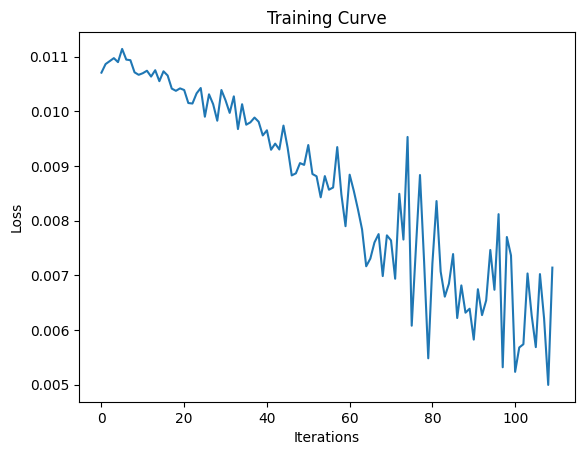

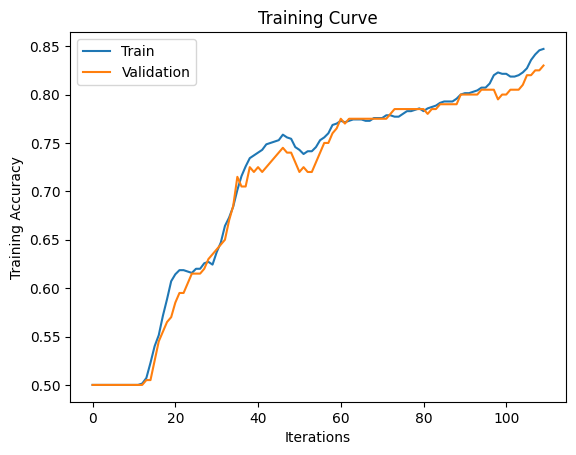

Final Training Accuracy: 0.8471428571428572
Final Validation Accuracy: 0.83


In [ ]:
# Train for small feature experiment - bs = 64, lr = 0.001 ,num_epochs = 10
train_data_small2 = datasets.ImageFolder(train_dir1, transform= size_compose)
val_data_small2 = datasets.ImageFolder(val_dir1,  transform= size_compose)

use_cuda = True

model_small2 = CNN_small2()

if use_cuda and torch.cuda.is_available():
  model_small2.cuda()
train_small2(model_small2, train_data_small2, batch_size=64, learning_rate = 0.001, num_epochs=10)

The dataset we used encompasses over 10,000 images across 21 distinct classes,  making the training process extremely time-consuming. To efficiently evaluate the feasibility of our model and dataset, we conducted a small trial focusing on two specific features extracted from the dataset. The 83% accuracy result of the experiment indicates that our dataset provides enough detail and information for the model to learn.

## 3.2 Baseline Model


This is epoch1 with Train accuracy: 0.08217687074829932 and Val acc: 0.07857142857142857
This is epoch2 with Train accuracy: 0.10666666666666667 and Val acc: 0.09952380952380953
This is epoch3 with Train accuracy: 0.13591836734693877 and Val acc: 0.13380952380952382
This is epoch4 with Train accuracy: 0.1910204081632653 and Val acc: 0.17476190476190476
This is epoch5 with Train accuracy: 0.23700680272108843 and Val acc: 0.21476190476190476
This is epoch6 with Train accuracy: 0.29768707482993195 and Val acc: 0.2557142857142857
This is epoch7 with Train accuracy: 0.34122448979591835 and Val acc: 0.28904761904761905
This is epoch8 with Train accuracy: 0.3725170068027211 and Val acc: 0.3142857142857143
This is epoch9 with Train accuracy: 0.38571428571428573 and Val acc: 0.31285714285714283
This is epoch10 with Train accuracy: 0.4197278911564626 and Val acc: 0.34


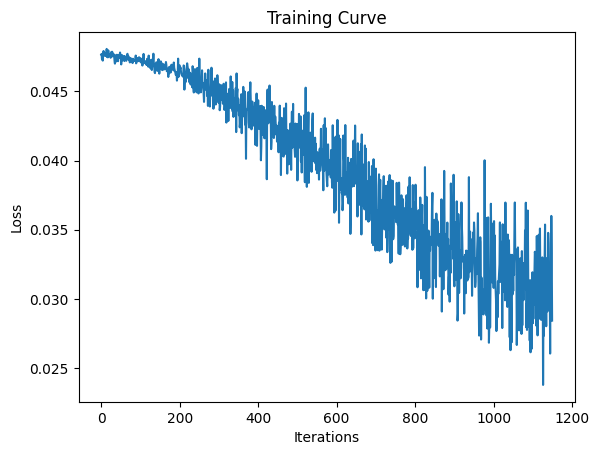

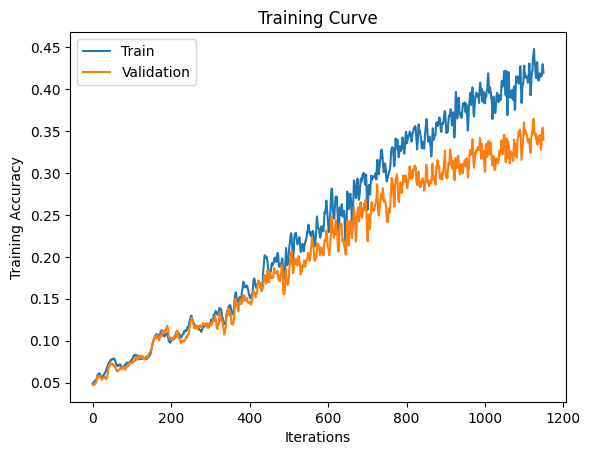

Final Training Accuracy: 0.4197278911564626
Final Validation Accuracy: 0.34


: 

In [ ]:
# Train for small feature experiment - bs = 64, lr = 0.001 ,num_epochs = 10
train_data_base = datasets.ImageFolder(train_dir, transform= size_compose)
val_data_base = datasets.ImageFolder(val_dir,  transform= size_compose)

use_cuda = True

model_base = CNN()

if use_cuda and torch.cuda.is_available():
  model_base.cuda()
train_base(model_base, train_data_base, batch_size=64, learning_rate = 0.001, num_epochs=10)

The final accuracy for both training and validation are low, which indicates that we need more training time,larger dataset,  or different model architectures to improve the performance. Since the small trial has verified that our dataset is large enough, and a 10 epoch training cycle is able to generate fairly good results, the following exploration will focus on finding other model architectures.

## 3.3 AlexNet Training


This is epoch1 with Train accuracy: 0.39714285714285713 and Val acc: 0.38285714285714284
This is epoch2 with Train accuracy: 0.6925170068027211 and Val acc: 0.6628571428571428
This is epoch3 with Train accuracy: 0.7598639455782313 and Val acc: 0.719047619047619
This is epoch4 with Train accuracy: 0.7917006802721088 and Val acc: 0.7542857142857143
This is epoch5 with Train accuracy: 0.8186394557823129 and Val acc: 0.7719047619047619
This is epoch6 with Train accuracy: 0.8389115646258504 and Val acc: 0.8042857142857143
This is epoch7 with Train accuracy: 0.8693877551020408 and Val acc: 0.8214285714285714
This is epoch8 with Train accuracy: 0.8948299319727891 and Val acc: 0.8376190476190476
This is epoch9 with Train accuracy: 0.90421768707483 and Val acc: 0.849047619047619
This is epoch10 with Train accuracy: 0.9137414965986395 and Val acc: 0.8547619047619047


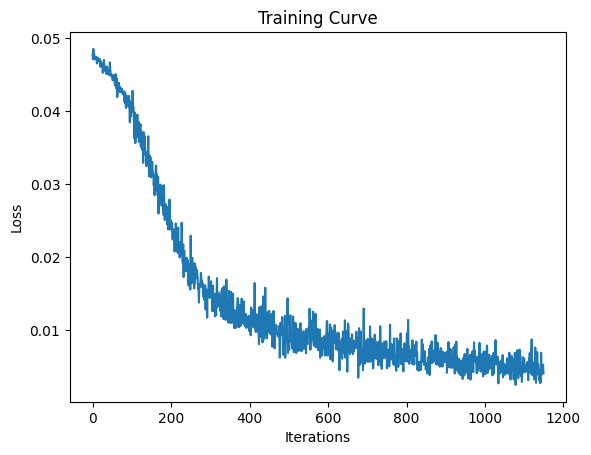

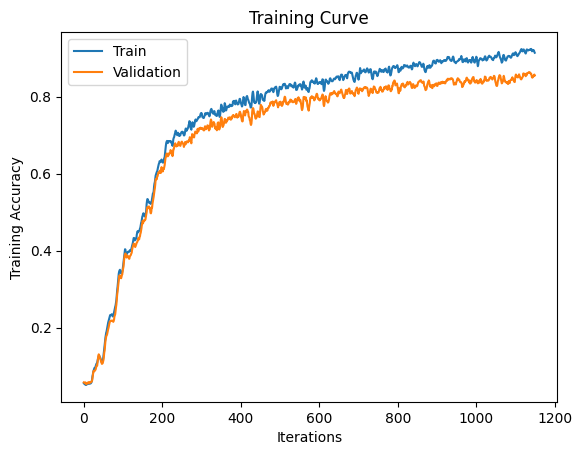

Final Training Accuracy: 0.9137414965986395
Final Validation Accuracy: 0.8547619047619047


In [ ]:
# Train for alexnet transfer learning experiment - bs = 64, lr = 0.001 ,num_epochs = 10

train_data_alexnet = torchvision.datasets.DatasetFolder('/content/Alex/train', loader=torch.load, extensions=('.tensor'))
val_data_alexnet = torchvision.datasets.DatasetFolder('/content/Alex/val', loader=torch.load, extensions=('.tensor'))
test_data_alexnet = torchvision.datasets.DatasetFolder('/content/Alex/test', loader=torch.load, extensions=('.tensor'))

use_cuda = True

model_transfer = CNN_transfer()

if use_cuda and torch.cuda.is_available():
  model_transfer.cuda()
train_transfer(model_transfer, train_data_alexnet, batch_size=64, num_epochs=10)

The results displayed a steady increase in both training and validation accuracy which is a positive signal of model performance. Starting from 39.7% in the first epoch, the training accuracy improves consistently, reaching approximately 91.37% by the 10th epoch. Validation accuracy also shows great improvement, beginning at 38.28% and end with 85.47%

The high accuracy indicates Alexnet performs much better than the baseline, and the progressive improvement suggests that the model is learning effectively from the data and is able to generalize well to new, unseen data. While the outcomes are satisfactory, it is prudent to explore additional models to ascertain if there is potential for further enhancement in the validation accuracy.



## 3.4 Googlenet training



Epoch 1/10, Train Loss: 0.4082737121893012, Train Accuracy: 0.925578231292517, Val Loss: 0.33425608728871203, Val Accuracy: 0.9261904761904762
Epoch 2/10, Train Loss: 0.29019551458566084, Train Accuracy: 0.9436734693877551, Val Loss: 0.25821995283618115, Val Accuracy: 0.9404761904761905
Epoch 3/10, Train Loss: 0.22667611286691997, Train Accuracy: 0.9560544217687075, Val Loss: 0.2140719895109986, Val Accuracy: 0.9514285714285714
Epoch 4/10, Train Loss: 0.1791939123817112, Train Accuracy: 0.9674829931972789, Val Loss: 0.18081037113160797, Val Accuracy: 0.9595238095238096
Epoch 5/10, Train Loss: 0.14074080826147742, Train Accuracy: 0.9746938775510204, Val Loss: 0.1563611211198749, Val Accuracy: 0.9619047619047619
Epoch 6/10, Train Loss: 0.11124451937882797, Train Accuracy: 0.9805442176870748, Val Loss: 0.142983371786999, Val Accuracy: 0.9647619047619047
Epoch 7/10, Train Loss: 0.09333090940895288, Train Accuracy: 0.9863945578231292, Val Loss: 0.12963678924874825, Val Accuracy: 0.965238095

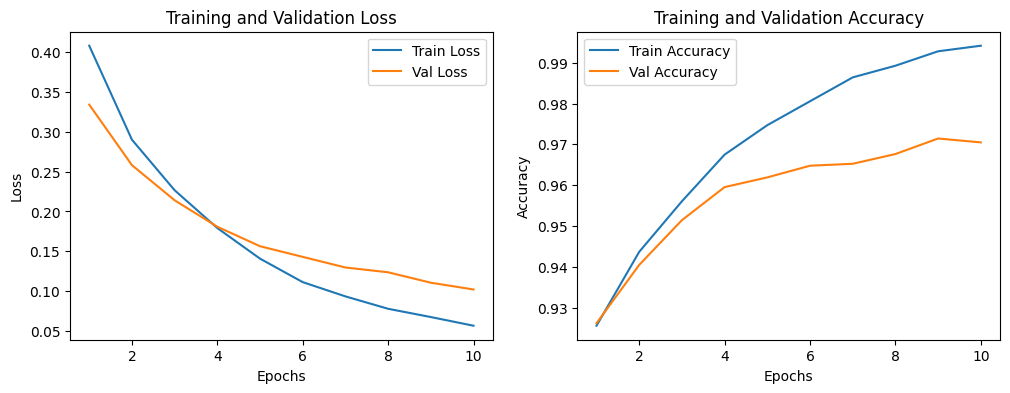

In [ ]:
# Lists to keep track of metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 10  # Define the number of epochs

for epoch in range(num_epochs):
    # Training
    googlenet.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = googlenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # Validation
    googlenet.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = googlenet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(valid_loader))
    val_accuracies.append(correct / total)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Val Loss: {val_losses[-1]}, Val Accuracy: {val_accuracies[-1]}")
    torch.save(googlenet.state_dict(), f"googlenet_epoch{epoch}")

# Plotting training and validation losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


After trying various models, Googlenet tends to have the best results. The final epoch ends with a training accuracy just under 100% and validation accuracy approximately 97%. These results suggest that this model fits our dataset very well, with neither overfitting nor underfitting problems. Based on these promising outcomes, Googlenet has been selected as the final model. We will then deploy this model on our test dataset to display the results.

# *Part4. Web UI interface and Final Result*

## 4.1 Install gradio

Gradio is an open-source Python library that makes it incredibly easy to create simple, yet powerful, interfaces for machine learning models. It's particularly popular for quickly prototyping and sharing machine learning models with others. See https://www.gradio.app/ for documentation.

In [ ]:
!pip install gradio

## 4.2 Web UI functionality

`img_classifier` is the core of the UI. It takes an image as input and classifies it into one of the predefined categories.

- Input Processing: Converts the input into a PIL image and preprocesses it for the GoogLeNet model.
- Model Loading: Loads the GoogLeNet model, and loads custom trained weights. Note that this part requires checkpoint `googlenet_epoch9` to work.
- Image Classification: The preprocessed image is classified, and the category is determined.

In [16]:
def img_classifier(input):
    try:
        pil_image = Image.fromarray(np.uint8(input)).convert('RGB')
        # Preprocess the image
        preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        image = preprocess(pil_image).unsqueeze(0)  # Add batch dimension

        # Load the pre-trained GoogLeNet model
        googlenet = models.googlenet(pretrained=True)
        googlenet.fc = nn.Linear(googlenet.fc.in_features, 21)

        # Set the device to GPU if available
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        googlenet.to(device)
        googlenet.load_state_dict(torch.load("/content/googlenet_epoch9", map_location=device))
        googlenet.eval()

        with torch.no_grad():
            output = googlenet(image.to(device))

        _, predicted = torch.max(output.data, 1)

        # index to label mapping
        index_to_class = {0: 'agricultural', 1: 'airplane', 2: 'baseballdiamond', 3: 'beach', 4: 'buildings',
                        5: 'chaparral', 6: 'denseresidential', 7: 'forest', 8: 'freeway', 9: 'golfcourse',
                        10: 'harbor', 11: 'intersection', 12: 'mediumresidential', 13: 'mobilehomepark',
                        14: 'overpass', 15: 'parkinglot', 16: 'river', 17: 'runway', 18: 'sparseresidential',
                        19: 'storagetanks', 20: 'tenniscourt'}

        # Return the classification result
        return index_to_class[predicted.item()]

    except Exception as e:
        # Print the error message
        print(f"An error occurred: {e}")

## 4.3 Web UI Interface


Feel free to try new data by yourself.

In [17]:
demo = gr.Interface(fn=img_classifier, inputs="image", outputs="label")
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9dc5c3db77f8bd22a7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 68.6MB/s]


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7866 <> https://9dc5c3db77f8bd22a7.gradio.live


## 4.4 Final Test Accuracy

In [ ]:
# Load the model checkpoint
checkpoint_path = "googlenet_epoch9"
googlenet.load_state_dict(torch.load(checkpoint_path, map_location=device))

# Evaluate the model
googlenet.eval() # Set the model to evaluation mode
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
  for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = googlenet(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test Loss: {test_loss / len(test_loader)}, Test Accuracy: {test_accuracy}")

Test Loss: 0.23176007235751434, Test Accuracy: 0.9352380952380952


The test accuracy of about 93.5% is in line with our expectations, and the excellent performance exhibited on the test data confirms the robustness of our approach. These results validate the success of our project and its potential for real-world applications!

# *Part5. Project Result and Discussion*

Please note that part of the code in this file is run locally and part is run on Google Colab. If you encounter any difficulties in reproducing the results, you can contact me via email.

- shawlue2@gmail.com


## 5.1 Project Result

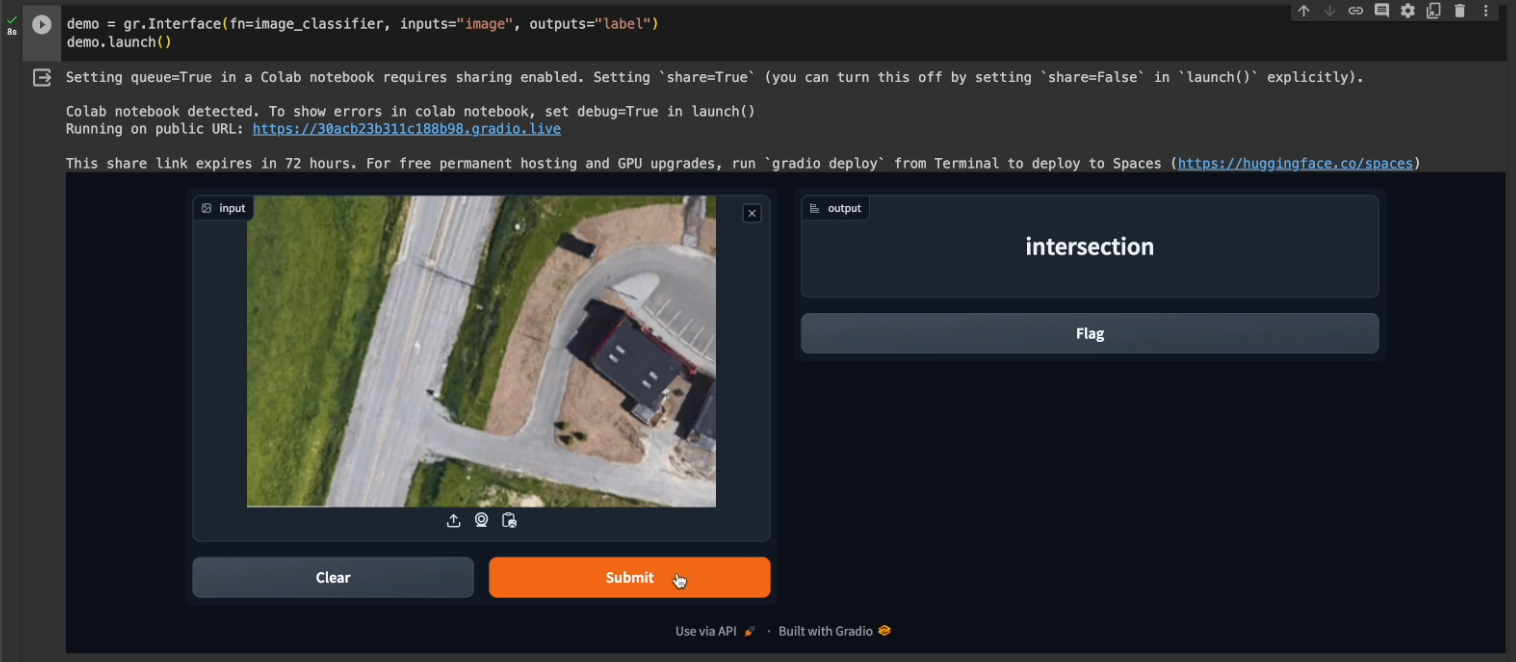

As the above image shown, our model is above to predict a new test image as the correct class! Feel free to try it with your own samples and play it around!

## 5.2 Project Pipeline

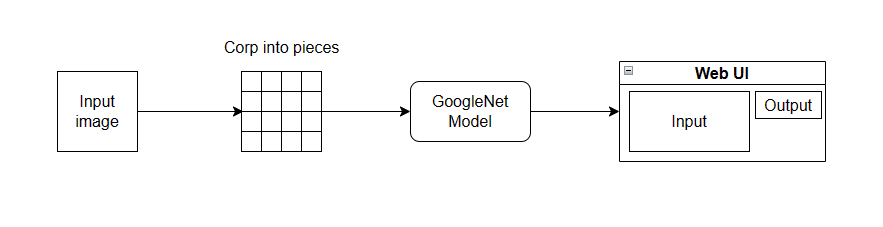


Our work can take any form of image (jpg or png) as input data. Additionally, you can even try a screenshot too! Next, the input will be broken into pieces and run the classification algorithm by GoogleNet. At the end, the result will be displayed at the top right corner of the Web UI.

## 5.3 Project Discussion

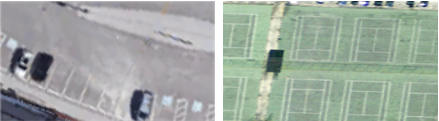

**A better way to corp image**

Since our algorithm simply corp at given size, some building may be cutted from the middle or contain two objects in one image. So that we might need better way to cut objects in a image. We have though of using image segmentation algorithm to enhance the ability of corp image based on bountries to minize the lost of image information.


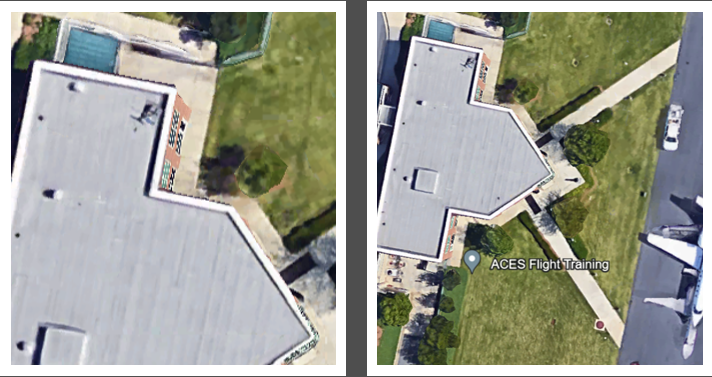


**Similiar and duplicate features**

Commonalities that shared by some landscape will lead to misclassification.For example,An empty parking lot is misclassified as a tennis court, although there does have clear feature of cars,The empty space that similar to an tennis court still dominant the picture in which the misclassification is reasonable​

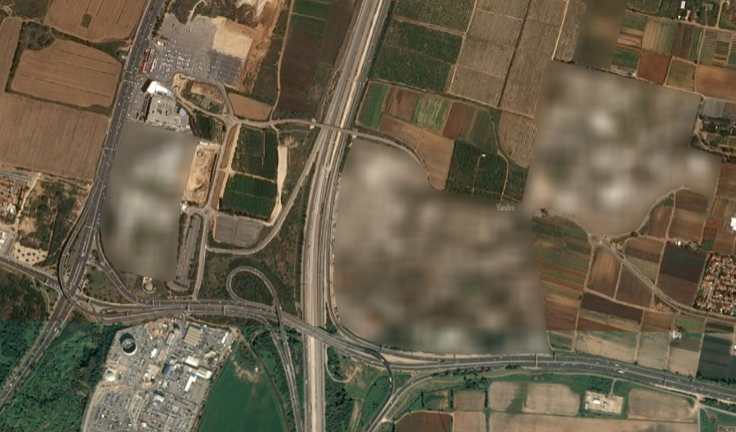

**Technical Bias**

Since our work requires a input of high quality satellite data, our model will experience reduced performance in scenarios such as high rise building with ' canyon effect', or dense forest that will impact the quanlity of satellite image resolutions.

## 5.4 Future Implementations

![real-easte img](https://www.piramalrealty.com/blog/wp-content/uploads/2023/01/Is-it-Wise-to-Buy-a-House-in-India-Despite-Rising-Prices-.png)

**Real-estate Price Estimation**

At the beginning we initially made our project to evaluate real-estate property pricing. More precisely, the price of a condominium is defined by its room type and building locations. Our algorithm will focus more on defining the exact value of its location by counting the number of essential structures such as highways, airports, harbours schools, and hospitals 10 miles around the condo​. After that, we assign different credits to each structure and calculate an estimate value of the condo location.

![urban img](https://greenrooftechnology.com/wp-content/uploads/2021/05/CityPlanning-1024x633.jpg)

**Urban City Analysis**

Our project can also be adapted to the analysis stage of urban city planning. Quickly identifying a list of land-use structure that appeared in the city map, provide urban designers with a good visualization of the city and find out what building is missing from this area.

![diaster img](https://1.bp.blogspot.com/-DUF-us8zm5o/X9kTkFk0BYI/AAAAAAAAGEQ/OYtCov4vuQMhpxt6iJVyC0dM8B8JiUXjQCLcBGAsYHQ/s2048/Disaster%2BManagement.webp)

**Natural Disaster Managment**

Our work is extremely useful in time-concerning situations like emergency response and disaster management. For example, In the case of flooding and earthquakes, our algorithm can quickly discover severed damaged-structure, crashed bridges and blocked roads. This will help the government to design a more effective disaster response and recovery planning.

References:

title image:https://toposmagazine.com/urban-planning-studies/

CNN image:https://datagen.tech/wp-content/uploads/2023/03/Typical_cnn.png

real-easte img:https://www.piramalrealty.com/blog/post/is-it-wise-to-buy-a-house-in-india-despite-rising-prices/

urban img:https://greenrooftechnology.com/urban-planning-in-north-america/

diaster img:https://www.journeywithasr.com/2020/12/disaster-management-note.html

(https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/)

https://www.gradio.app/